# Pierson and Moskowitz (1964), OTD

$$S(\omega)=0.0081 \cdot g^{2} \cdot \omega^{-5} \cdot e^{-1.25(\frac{\omega}{\omega_{p}})^{-4}}$$


$$\omega_{p}=0.879 \cdot \frac{g}{U}$$

$U$ = Wind velocity at 19.5 m high

In [8]:
# arrays
import numpy as np

# plots
import matplotlib.pyplot as plt

# panel interaction
import panel as pn
pn.extension() # this is very important for notebook display


In [9]:
def plotPM(f, Sf):
    
    fig = plt.figure(figsize=(7,7))
    plt.plot(f, Sf, c='b')
    plt.fill_between(f, np.full(len(f), 0), Sf, color='b', alpha=0.3)
    plt.xlim(0, 2)
    plt.ylim(0, 250)
    plt.title('Pierson-Moskowitz Spectra')
    plt.xlabel('$w$ (rad/s)')
    plt.ylabel('$S(w)$ ($m^{2} \cdot s$)')
    plt.close()
    return(fig)

In [10]:
def PM(U):
    'Evaluate the PM parameter of the wave spectrum defined by PSD=f(f, E)'
    
    #f = np.linspace(1/30, 1, 100)
    w = np.linspace(0.01, 2, 200)
    #w = f / (2*np.pi)
    g = 9.81
    wp = 0.879 * (g/U) 
    
    # Calculate spectral shape
    Sw = 0.0081 * (g**2) * w**(-5) * np.exp(-1.25*(w/wp)**(-4))
    Sf = Sw / (2*np.pi)
    
    # call figure to plot
    fig = plotPM(w, Sw)
    
    return(fig)

In [11]:
kw = dict(
    U=(0, 50, 2, 10)
)

In [12]:
i = pn.interact(PM, **kw)


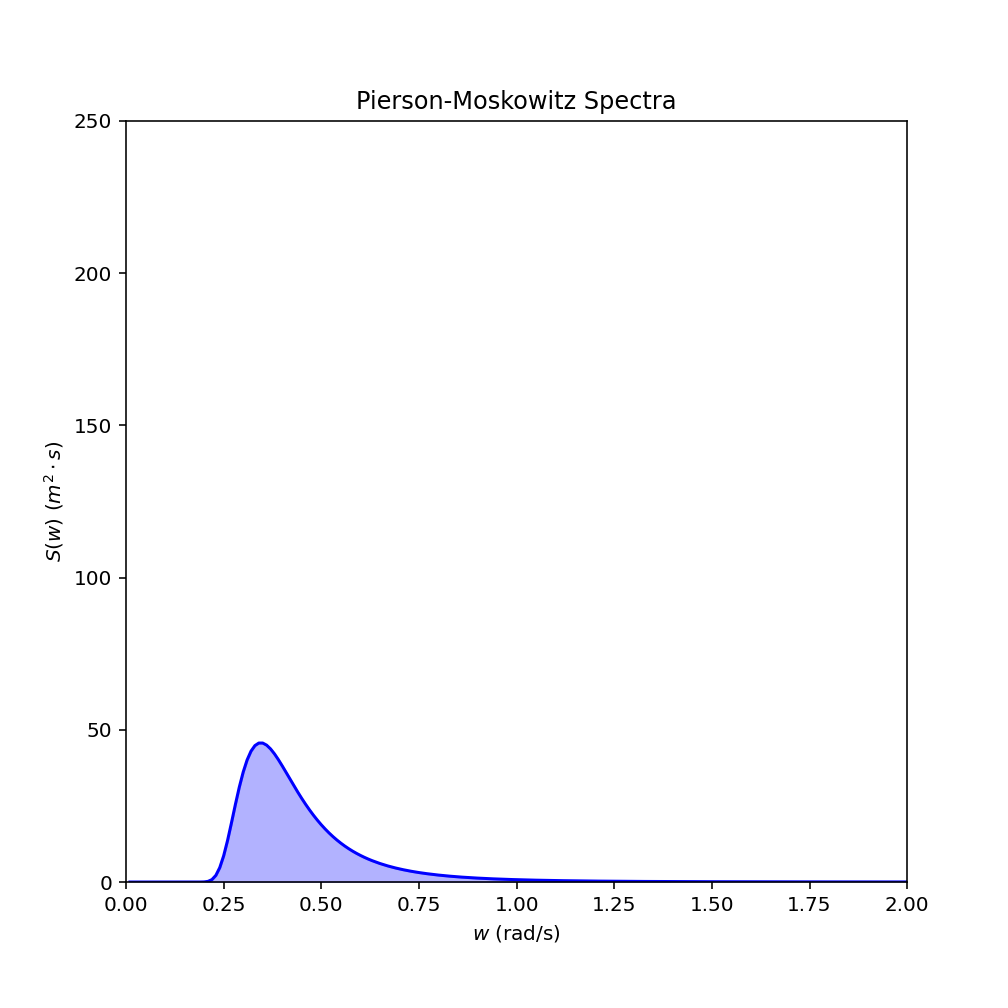
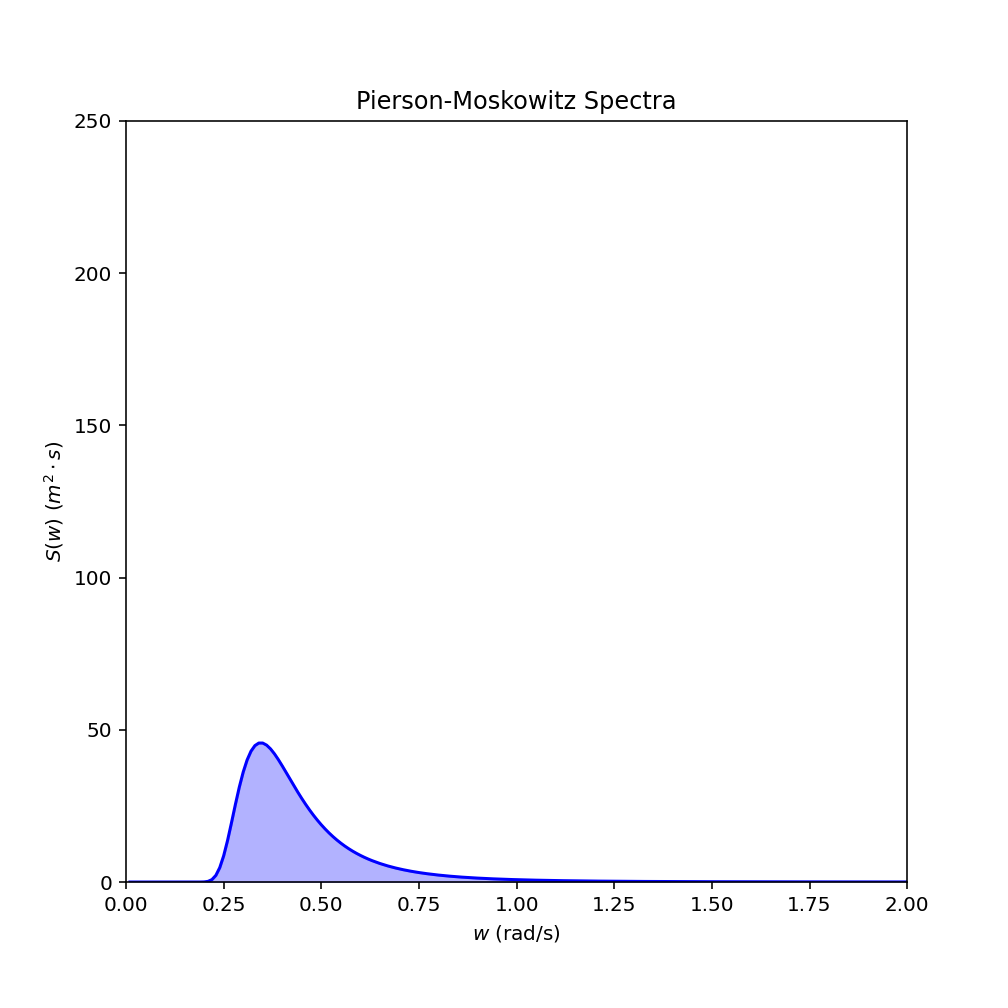
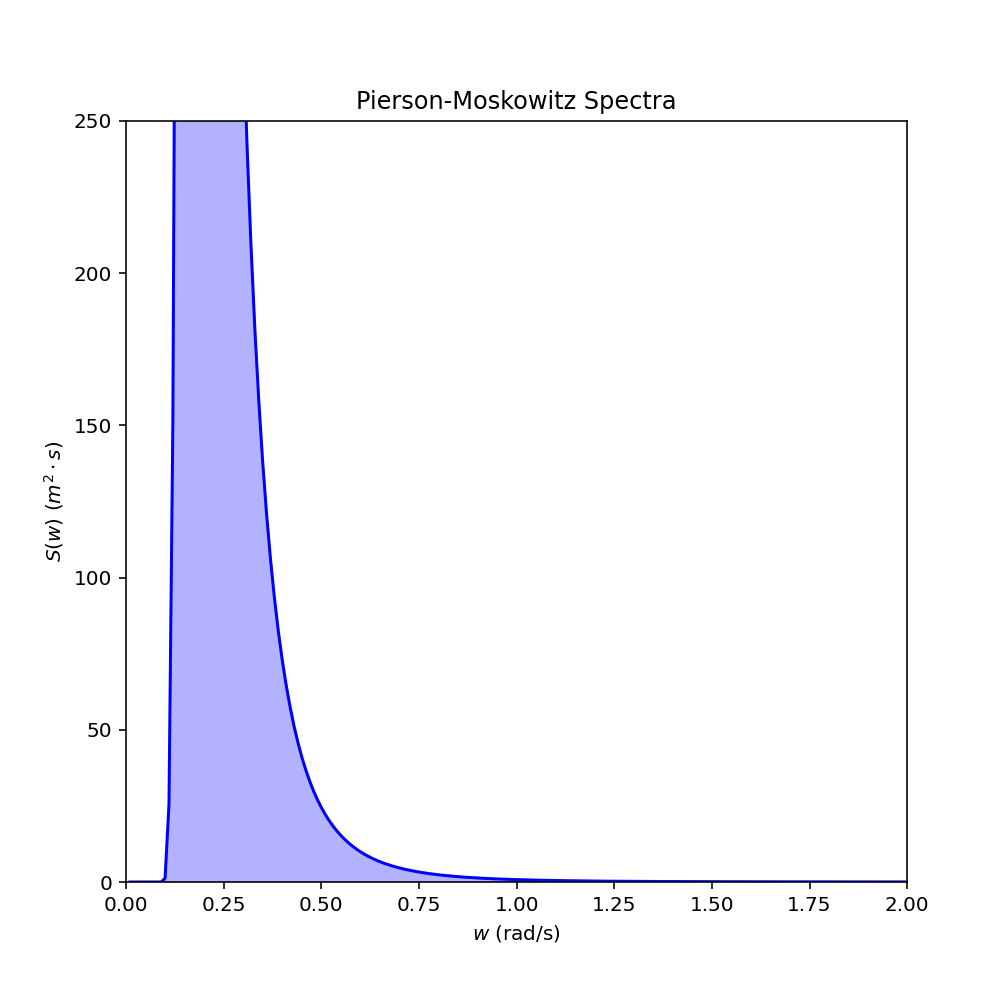

In [13]:
panel = pn.Column(
    '**Custom Pierson-Moskowitz spectrum from U (m/s) parameter**',
    pn.Row(
        i[0][0],
    ),
    pn.Row(i[1])
)
panel.embed()